In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
#from jh_utils.data.pandas.preprocessing import make_dummies
from get_df import get_data_for_ml,keep_cols,small_column_names_for_mldf
from plot import lines_plot, columnX
import seaborn as sns
import statsmodels.tsa.stattools as smt
from get_df import get_data_for_ml,keep_cols, get_data
from itertools import combinations,permutations

In [3]:
def plot_ccf_sm(target, exog, unbiased=False, nlags=30):
    """Plot CCF using Statsmodels"""
    ccfs = smt.ccf(target, exog, adjusted=False)[:nlags+1]
    lags = np.arange(len(ccfs))[:nlags+1]
    _ = plt.stem(lags, ccfs, use_line_collection=True)
    _ = plt.title(f"Cross Correlation (Statsmodels): {target.name} & {exog.name}")
    _ = plt.show()

In [10]:
def get_dfs_for_ml(column_token = 'precipitacao'):
    df = get_data_for_ml()
    cols_to_keep = ['date_time']+list(filter(lambda x: column_token in x, df.columns)) + list(df.columns[-19:])
    cols_to_keep = list(filter(lambda x: x not in ['hour','month','year','day_of_year','weekofyear'], cols_to_keep))
    df = df[cols_to_keep]
    df_just_stocastic = df.iloc[:,:4]
    df_just_stocastic.columns = ['A613','A614','A634','A612']
    df.index = df.date_time
    df = df.resample('1D').mean()
    df.drop(['hour_9', 'hour_9**2','hour_9**3'],axis=1,inplace=True)
    return df,df_just_stocastic

In [11]:
df,df_just_stocastic = get_dfs_for_ml(column_token = 'precipitacao')

/home/joaoholz/Documents/LSTAT/joao/trabalho2/get_df.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date_time.dt.weekofyear


In [12]:
df.columns

Index(['A613 - precipitacao total, horario (mm)',
       'A614 - precipitacao total, horario (mm)',
       'A634 - precipitacao total, horario (mm)',
       'A612 - precipitacao total, horario (mm)', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

In [13]:
def cross_plots(df):
    ls = list(permutations(range(df.shape[1]),2))
    for i in ls:
        plot_ccf_sm(df.iloc[:,i[0]],df.iloc[:,i[1]])  

<AxesSubplot:>

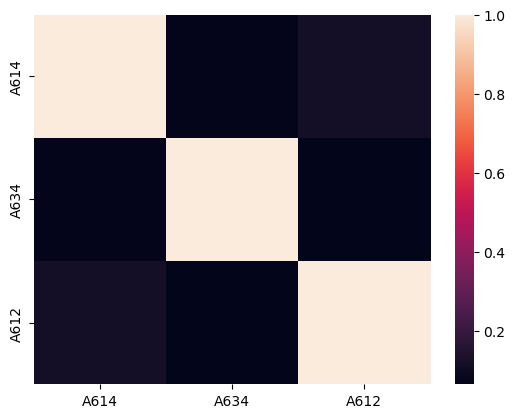

In [14]:
sns.heatmap(df_just_stocastic.corr())

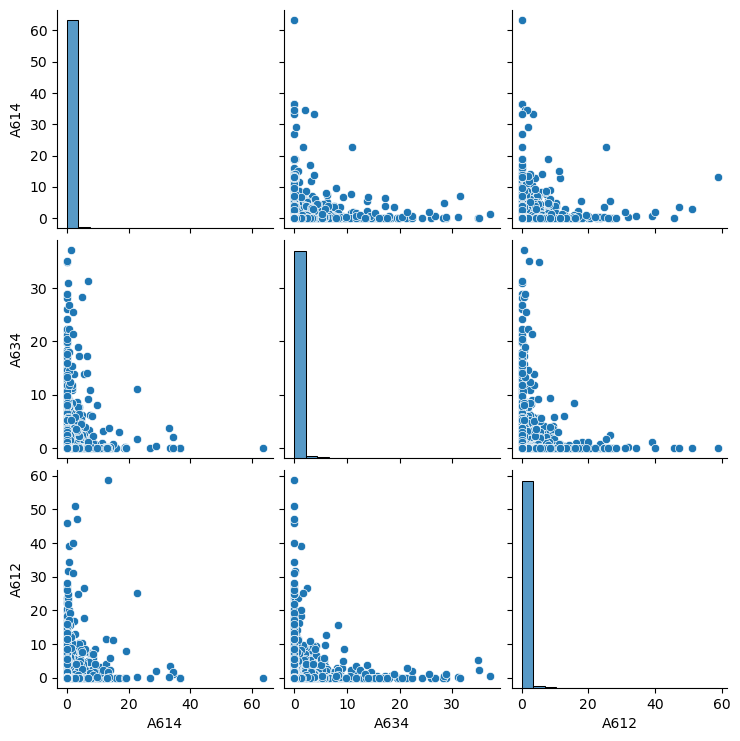

In [15]:
sns.pairplot(df_just_stocastic)

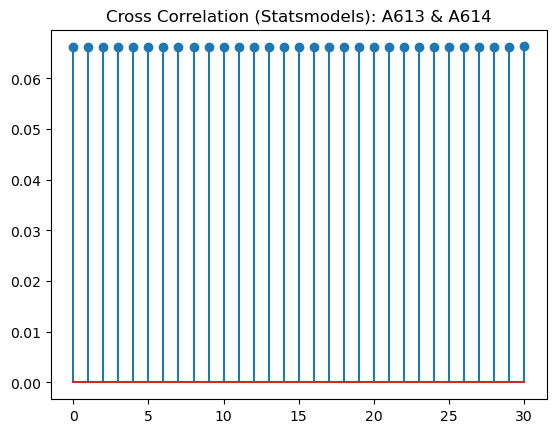

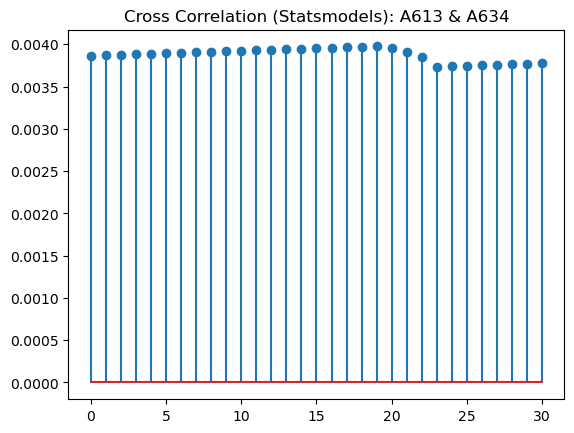

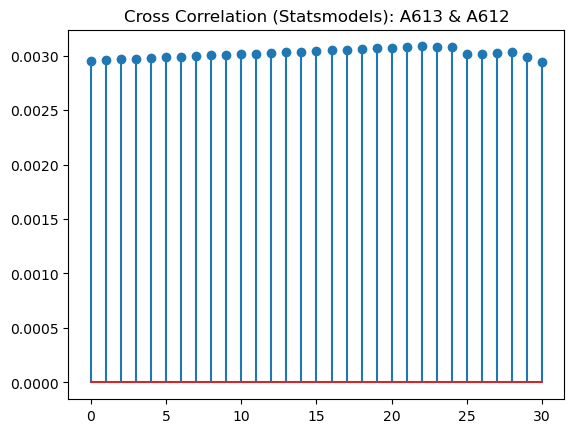

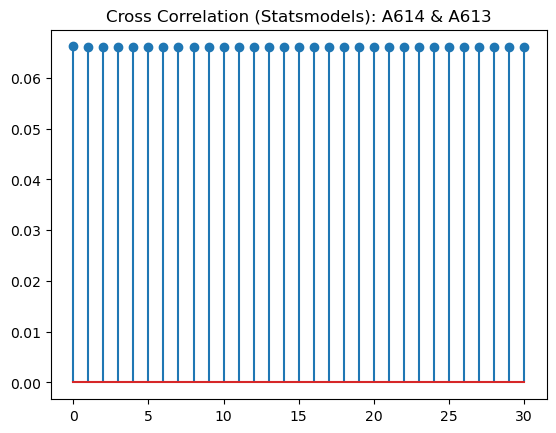

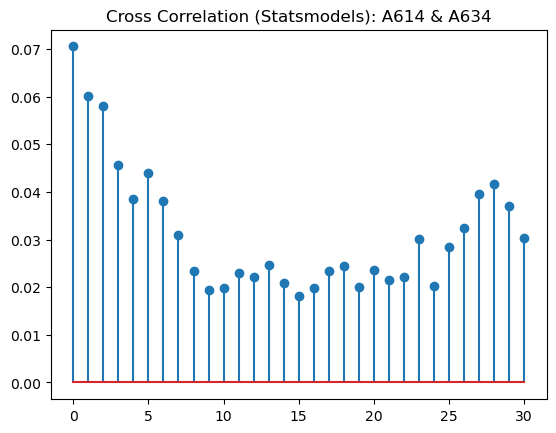

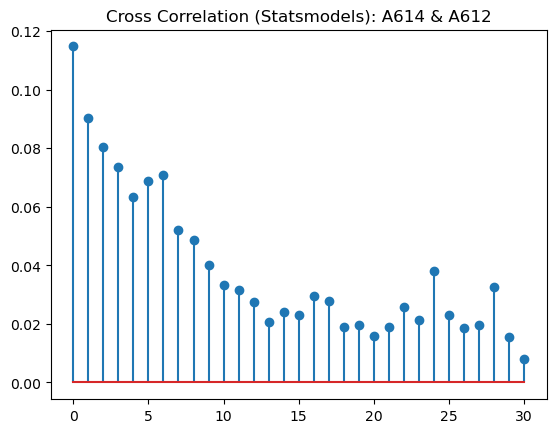

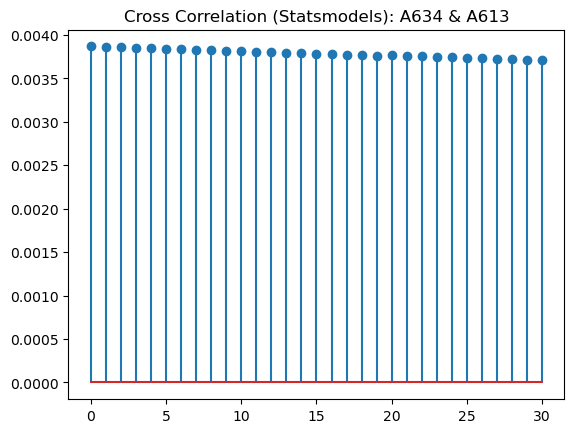

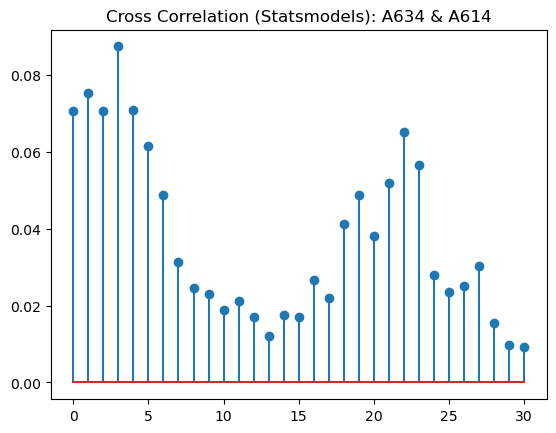

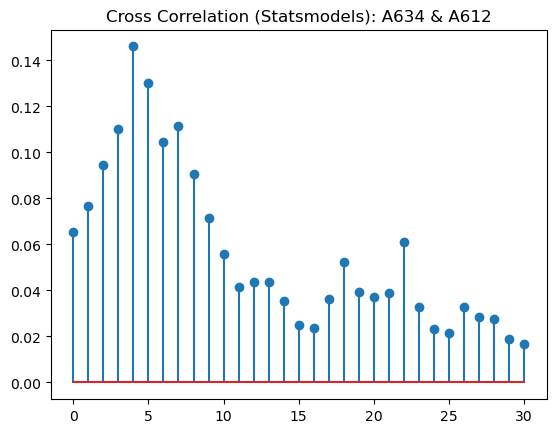

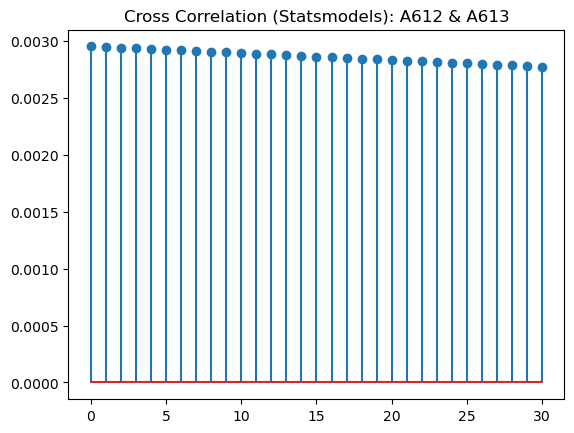

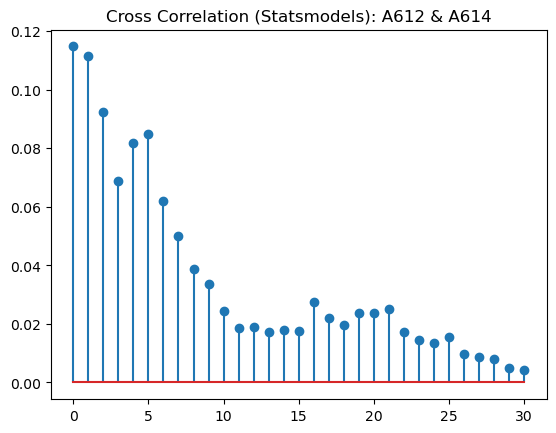

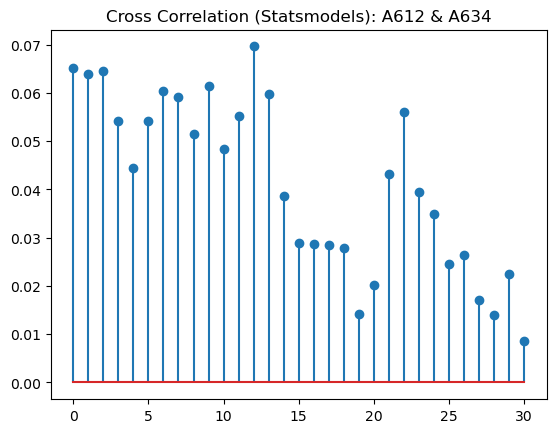

In [16]:
cross_plots(df_just_stocastic)